<a href="https://colab.research.google.com/github/cyber-noob/STD-Dataset-Hackerearth/blob/master/std_base_score_prediction(nlp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Related Links:

1. Dataset: https://drive.google.com/drive/folders/13o-AaAzHfVZGT-JZiDfL13CT4VvcALS7?usp=sharing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [3]:
import os 
  
if 'COLAB_TPU_ADDR' not in os.environ: 
  print('Not connected to TPU') 
else: 
  print("Connected to TPU") 

Not connected to TPU


In [6]:
!pip install contractions

     |████████████████████████████████| 245kB 4.5MB/s 
     |████████████████████████████████| 317kB 10.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81699 sha256=07680aa961c879f7f09c9d332f0f38e4cd1f1cca9c95b9d3abbb9e4c5d040cf7
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [0]:
import tqdm
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Flatten, Embedding, MaxPooling1D, LSTM, InputLayer
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
rows = pd.read_csv('/content/drive/My Drive/HackerEarth/nlp/dataset/dataset/train.csv')

In [7]:
rows.head(2)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458


In [8]:
#Lets check if there are any missing elements in the dataset
rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [0]:
train_df = rows.copy()

In [0]:
rows1 = pd.read_csv('/content/drive/My Drive/HackerEarth/nlp/dataset/dataset/test.csv')

In [11]:
rows1.head(2)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9


In [12]:
rows1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patient_id                  10760 non-null  int64 
 1   name_of_drug                10760 non-null  object
 2   review_by_patient           10760 non-null  object
 3   drug_approved_by_UIC        10760 non-null  object
 4   number_of_times_prescribed  10760 non-null  int64 
 5   use_case_for_drug           10760 non-null  object
 6   effectiveness_rating        10760 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 588.6+ KB


In [0]:
test_df = rows1.copy()

In [14]:
#Percentage of missing values in each column
train_df.isna().mean() * 100

patient_id                    0.0
name_of_drug                  0.0
use_case_for_drug             0.0
review_by_patient             0.0
effectiveness_rating          0.0
drug_approved_by_UIC          0.0
number_of_times_prescribed    0.0
base_score                    0.0
dtype: float64

In [15]:
train_df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [0]:
#Let's combine all the columns having text data as one
train_df['text'] = train_df['review_by_patient'] + ' ' + train_df['use_case_for_drug'] + ' ' + train_df['name_of_drug']
del train_df['review_by_patient']
del train_df['use_case_for_drug']
del train_df['name_of_drug']
del train_df['patient_id']

In [17]:
train_df.head()

,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,text
0,9,20-May-12,27,8.022969,"""It has no side effect, I take it in combinati..."
1,8,27-Apr-10,192,7.858458,"""My son is halfway through his fourth week of ..."
2,5,14-Dec-09,17,6.341969,"""I used to take another oral contraceptive, wh..."
3,9,27-Nov-16,37,6.590176,"""Suboxone has completely turned my life around..."
4,2,28-Nov-15,43,6.144782,"""2nd day on 5mg started to work with rock hard..."


In [18]:
train_df['drug_approved_by_UIC'] = pd.to_datetime(train_df['drug_approved_by_UIC'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   effectiveness_rating        32165 non-null  int64         
 1   drug_approved_by_UIC        32165 non-null  datetime64[ns]
 2   number_of_times_prescribed  32165 non-null  int64         
 3   base_score                  32165 non-null  float64       
 4   text                        32165 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ MB


In [0]:
#Let's extract features from our date time series (drug_approved_by_UIC) column
train_df['day'] = train_df['drug_approved_by_UIC'].dt.day
train_df['month'] = train_df['drug_approved_by_UIC'].dt.month
train_df['year'] = train_df['drug_approved_by_UIC'].dt.year

In [0]:
del train_df['drug_approved_by_UIC']

In [0]:
train_df['effectiveness_rating'] = train_df['effectiveness_rating'].astype(int)
train_df['number_of_times_prescribed'] = train_df['number_of_times_prescribed'].astype(int)
train_df['base_score'] = train_df['base_score'].astype(float)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   effectiveness_rating        32165 non-null  int64  
 1   number_of_times_prescribed  32165 non-null  int64  
 2   base_score                  32165 non-null  float64
 3   text                        32165 non-null  object 
 4   day                         32165 non-null  int64  
 5   month                       32165 non-null  int64  
 6   year                        32165 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.7+ MB


#EDA



> **Effectiveness score** is basically the statistical measure of how effective the drug administered to the patient will be but the **Base score** is dependent on many other factors such as patient review/satisfaction and effectiveness of the drug.



> We shall be expecting a Positive correlation between effectiveness score and base score, i.e., as the effectiveness score rises there will be a rise in base score




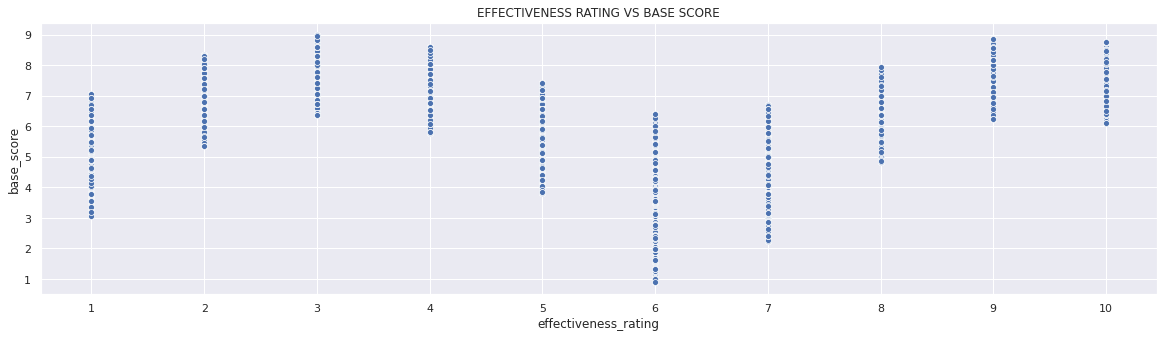

In [23]:
sns.set()
plt.figure(figsize = (20,5))
sns.scatterplot(train_df['effectiveness_rating'], train_df['base_score'])
plt.xticks(np.arange(min(train_df['effectiveness_rating']),max(train_df['effectiveness_rating'])+1))
plt.title('EFFECTIVENESS RATING VS BASE SCORE')
plt.show()

In [24]:
from scipy.stats import spearmanr
corr, _ = spearmanr(train_df['effectiveness_rating'], train_df['base_score'])
print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.454


**Spearman's Correlation:**


> The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables. Or put in simple words it measures whether the variables are directly proportional or inversely proportional.



The Spearman's Correlation ranges from -1 to 1 indicating "Negative Correlation" and "Positive Correlation" respectively with 0 indicating "Neutral".

We have a Spearman's Correlation score of 0.45 indicating that there is a **weak positive correlation** between our variables and this is proved by our scatter plot too.

If we take a closer look at our scatter plot there is a rise in base score followed by a fall in mid ranges and then followed by a rise forming triangle patterns. Maybe this might be the effect of patient reviews on the drug administered to them because strong drugs are known to cause side some negligible side effects and discomforts on humans. Or it might be due to the fact that few medicines were intentionally given to patients to figure out their actual illness.

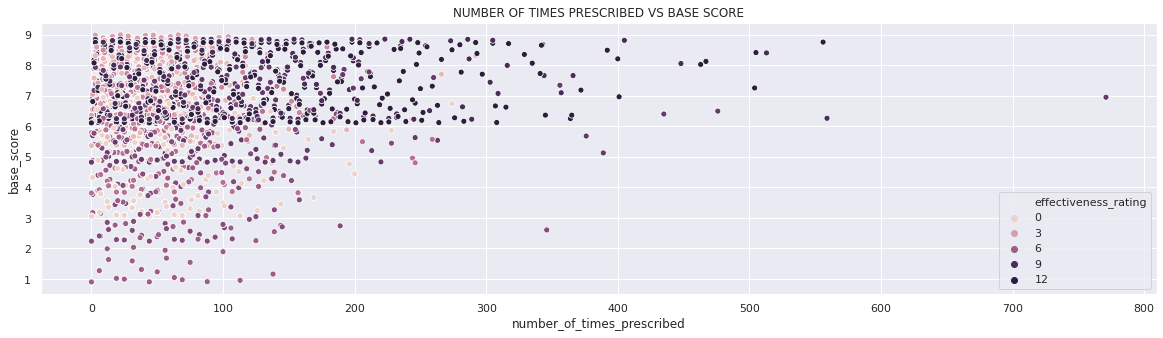

In [25]:
plt.figure(figsize = (20,5))
sns.scatterplot(train_df['number_of_times_prescribed'], train_df['base_score'], hue = train_df['effectiveness_rating'])
# plt.xticks(np.arange(min(train_df['number_of_times_prescribed']),max(train_df['effectiveness_rating'])+1))
plt.title('NUMBER OF TIMES PRESCRIBED VS BASE SCORE')
plt.show()



> From the above plot we observe that most of the highle prescribed drugs have high effectiveness_rating and high base_score. This is due to the fact that base score is the direct reflection of patient's likeliness towards the medication combined with the statistical effectiveness of the drug results in more happy patients.



In [0]:
#counts the sum of "number_of_times_prescribed" column for each "use_case_for_drug"
temp = rows.groupby('use_case_for_drug')[['number_of_times_prescribed']].sum()
temp.reset_index(inplace = True)
temp = temp.sort_values(by = ['number_of_times_prescribed'], ascending = False)

In [0]:
temp.reset_index(drop = True, inplace = True)

In [28]:
temp.head()

,use_case_for_drug,number_of_times_prescribed
0,Depression,90278
1,Anxiety,57029
2,Pain,45515
3,Birth Control,44608
4,Bipolar Disorde,28535


no. of use cases of drugs : 32165
Most prescribed use case for drug : Depression  -  90278
Since there are too many use cases in out dataset we shall be plotting the top 20 use cases our drugs below


-------------------------------------------------------------------------------------------------------------------------------------


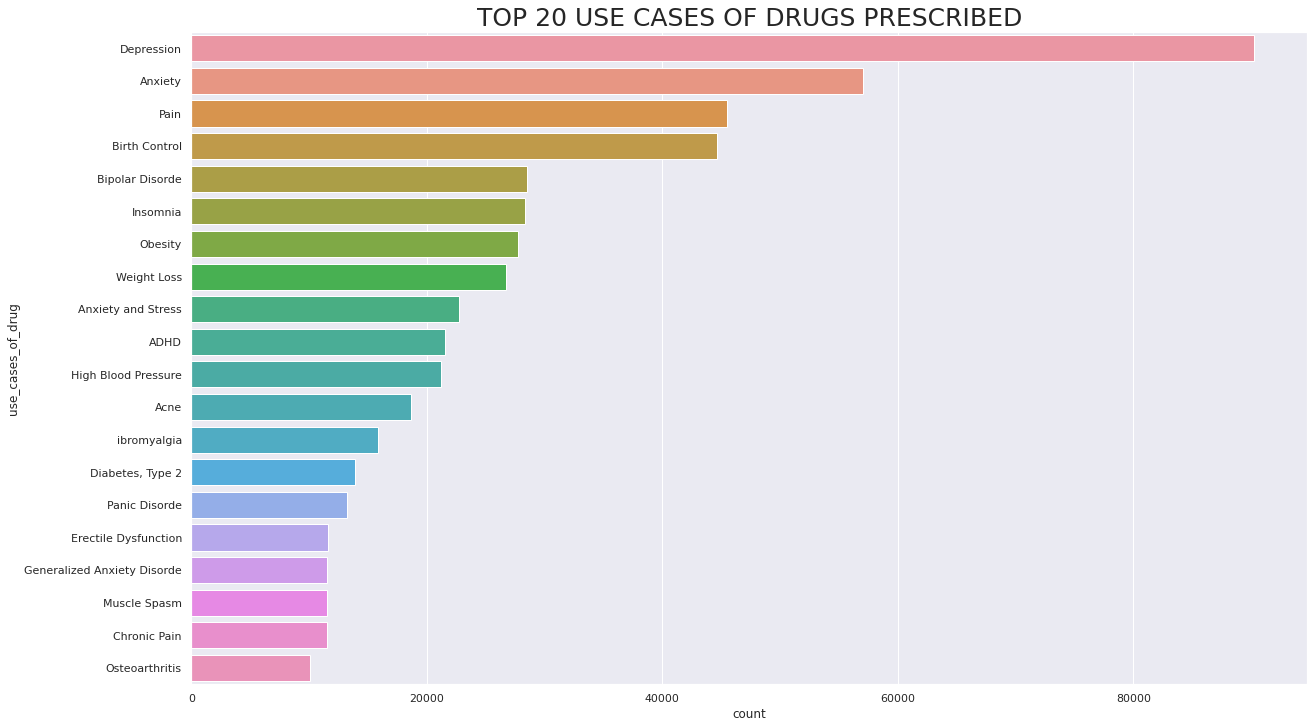

In [29]:
print("no. of use cases of drugs :", np.count_nonzero(rows['use_case_for_drug']))
print("Most prescribed use case for drug :", temp['use_case_for_drug'][0]," - ", temp['number_of_times_prescribed'][0])
print("Since there are too many use cases in out dataset we shall be plotting the top 20 use cases our drugs below")
print('\n\n-------------------------------------------------------------------------------------------------------------------------------------')
plt.figure(figsize = (20,12))
sns.barplot(x = temp['number_of_times_prescribed'][:20], y = temp['use_case_for_drug'][:20])
plt.xlabel('count')
plt.ylabel('use_cases_of_drug')
plt.title('TOP 20 USE CASES OF DRUGS PRESCRIBED', fontdict={'fontsize':25})
plt.show()

The top use cases of the drugs prescribed are

  * Depression - 90278
  * Anxiety - 	57029
  * Pain - 	45515
  * Birth Control - 44608

This graph doesn't come as a surprise to us due to the facts such as overpopulation, increasing cost of living, increased use of social media and spending more time on virtual world etc.



In [30]:
#counts the sum of "number_of_times_prescribed" column for each "use_case_for_drug"
temp = rows.groupby(['name_of_drug'])[['number_of_times_prescribed']].sum()
temp.reset_index(inplace = True)
temp = temp.sort_values(by = ['number_of_times_prescribed'], ascending = False)
temp.reset_index(drop = True, inplace = True)
temp.head()

,name_of_drug,number_of_times_prescribed
0,Sertraline,10875
1,Gabapentin,10786
2,Citalopram,10390
3,Escitalopram,10349
4,Lexapro,9712


no. of use cases of drugs : 32165
Most prescribed use case for drug : Sertraline  -  10875
Since there are too many use cases in out dataset we shall be plotting the top 20 use cases our drugs below


-------------------------------------------------------------------------------------------------------------------------------------


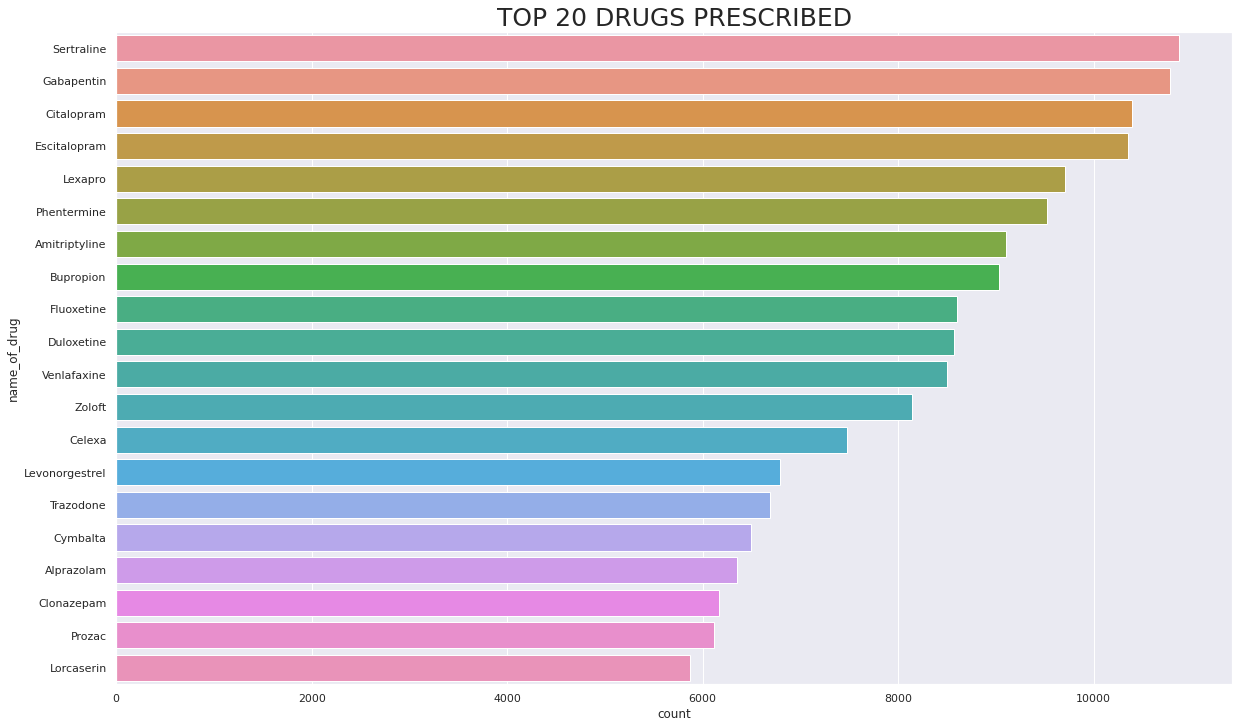

In [31]:
print("no. of use cases of drugs :", np.count_nonzero(rows['use_case_for_drug']))
print("Most prescribed use case for drug :", temp['name_of_drug'][0]," - ", temp['number_of_times_prescribed'][0])
print("Since there are too many use cases in out dataset we shall be plotting the top 20 use cases our drugs below")
print('\n\n-------------------------------------------------------------------------------------------------------------------------------------')
plt.figure(figsize = (20,12))
sns.barplot(x = temp['number_of_times_prescribed'][:20], y = temp['name_of_drug'][:20])
plt.xlabel('count')
plt.ylabel('name_of_drug')
plt.title('TOP 20 DRUGS PRESCRIBED', fontdict={'fontsize':25})
plt.show()



> Now lets check out the distribution of base scores for highest use case **Depression**



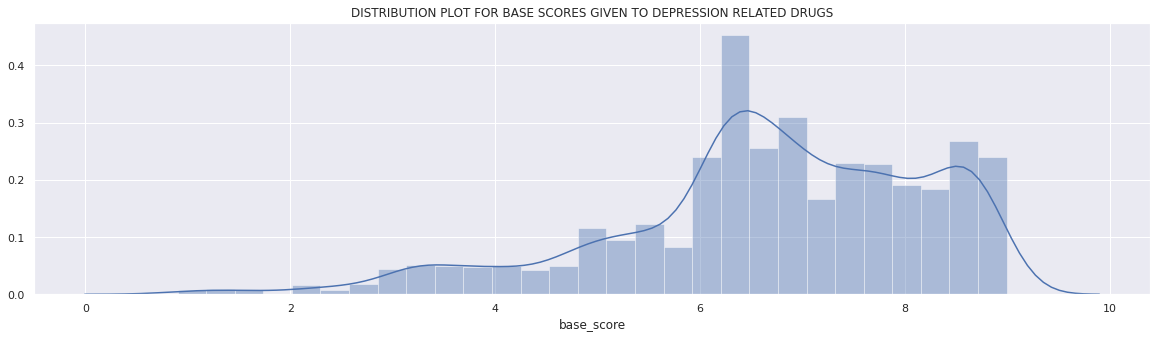

In [32]:
plt.figure(figsize = (20,5))
sns.distplot(rows[rows['use_case_for_drug'] == 'Depression']['base_score'])
plt.title("DISTRIBUTION PLOT FOR BASE SCORES GIVEN TO DEPRESSION RELATED DRUGS")
plt.show()

In [33]:
rows.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,32165.0,115487.511052,67146.156602,9.000000,56922.000000,115776.000000,173562.00000,232289.000000
effectiveness_rating,32165.0,6.998912,3.274781,1.000000,5.000000,8.000000,10.00000,10.000000
number_of_times_prescribed,32165.0,27.893207,35.819035,0.000000,6.000000,16.000000,36.00000,771.000000
base_score,32165.0,6.664261,1.588699,0.899076,6.109307,6.788245,7.90079,8.992453


In [34]:
temp = []
for i in range(101): 
  temp.append([i,np.nanpercentile(rows['base_score'],i)]) 
temp = pd.DataFrame(temp, columns = ['percentile','base_score'])
temp.head()

,percentile,base_score
0,0,0.899076
1,1,2.234840
2,2,2.645092
3,3,3.054420
4,4,3.167946


In [35]:
temp = temp.merge(train_df, on = 'base_score', how = 'right')
temp = temp.dropna()
temp.reset_index(drop = True, inplace = True)
temp.head()

,percentile,base_score,effectiveness_rating,number_of_times_prescribed,text,day,month,year
0,0.0,0.899076,6,0,"""This med helps to take the edge off enough fo...",10,11,2017
1,0.0,0.899076,6,0,"""I have had Implanon for two and a half years....",14,11,2011
2,0.0,0.899076,6,0,"""I was prescribed birth control about 6 years ...",14,6,2017
3,0.0,0.899076,6,0,"""My gyn put me on Aviane... So I was taking th...",14,12,2016
4,0.0,0.899076,6,0,"""I got my Nexplanon put in April 16th. Inserti...",3,6,2015


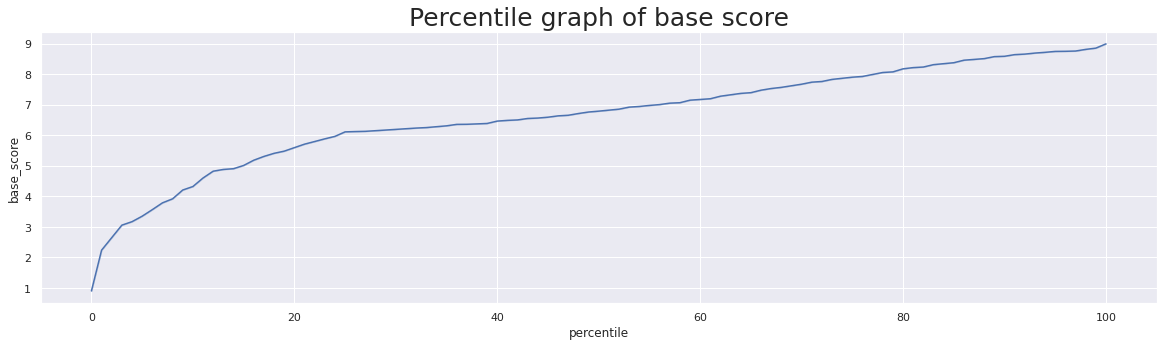

In [39]:
plt.figure(figsize = (20,5))
sns.lineplot(temp['percentile'], temp['base_score'])
plt.title('Percentile graph of base score', fontdict={'fontsize':25})
plt.show()

80% of the time base score lies between 0-8 (approx.)

In [0]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)


comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in rows['review_by_patient']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

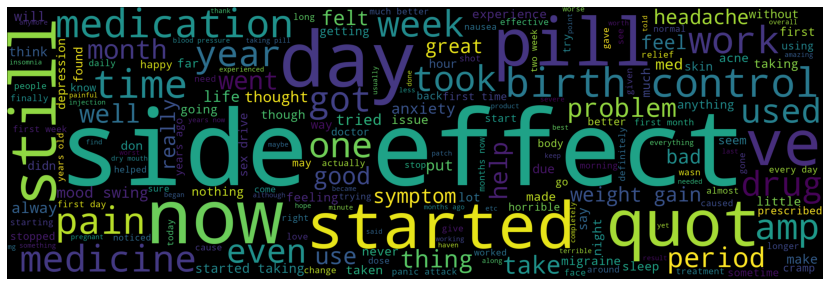

In [41]:
wordcloud = WordCloud(width = 2400, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (30,5)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

> This word cloud confirms our previous story that most of the time the base score of the drug is highly affected by negative words such as "side effect", "pain", "problem" etc... eventhough the drug has higher effectiveness_rating.

#NLP TYM

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [0]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [0]:
class cleantext():
    
    def __init__(self, text = "test"):
        self.text = text
        
    def strip_html(self):
        soup = BeautifulSoup(self.text, "html.parser")
        self.text = soup.get_text()
        return self

    def remove_between_square_brackets(self):
        self.text = re.sub('\[[^]]*\]', '', self.text)
        self.text = re.sub('[^A-Za-z0-9]+', '',self.text)
        self.text = re.sub('//','',self.text)
        return self

    def remove_numbers(self):
        self.text = re.sub('[-+]?[0-9]+', '', self.text)
        return self

    def replace_contractions(self):
        """Replace contractions in string of text"""
        self.text = contractions.fix(self.text)
        return self
    
    def get_words(self):
        self.words = nltk.word_tokenize(self.text)
        return self

    def remove_non_ascii(self):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in self.words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        self.words = new_words
        return self

    def to_lowercase(self):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in self.words:
            new_word = word.lower()
            new_words.append(new_word)
        self.words = new_words
        return self

    def remove_punctuation(self):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in self.words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        self.words = new_words
        return self

    def replace_numbers(self):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in self.words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        self.words = new_words
        return self

    def remove_stopwords(self):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in self.words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        self.words = new_words
        return self
    def stem_words(self):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in self.words:
            stem = stemmer.stem(word)
            stems.append(stem)
        self.words = stems
        return self

    def lemmatize_verbs(self):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in self.words:
            pos = pos_tag(word)
            lemma = lemmatizer.lemmatize(word,get_simple_pos(pos[0][1]))
            lemmas.append(lemma)
        self.words = lemmas
        return self
    
    def join_words(self):
        self.words = ' '.join(self.words)
        return self

    def stripper(self,text):
      self.text = text
      self = self.strip_html()
      self = self.remove_numbers()
      return self.text

    def chug(self,text):
      self.text = text
      self = self.get_words()
      return self.words

    def dummy(self,text):
      self.text = text
      self = self.strip_html()
      self = self.remove_between_square_brackets()
      self = self.replace_contractions()
      self = self.get_words()
      self = self.remove_non_ascii()
      self = self.remove_punctuation()
      self = self.replace_numbers()
      self = self.to_lowercase()
      self = self.remove_stopwords()
      self = self.join_words()
        
      return self.words
    
    def do_all(self, text):
        
        self.text = text
        self = self.strip_html()
        self = self.replace_contractions()
        self = self.get_words()
        self = self.remove_non_ascii()
        self = self.remove_punctuation()
        self = self.replace_numbers()
        self = self.to_lowercase()
        self = self.remove_stopwords()
        self = self.stem_words()
        self = self.lemmatize_verbs()
        self = self.remove_numbers()
        self = self.join_words()
        
        return self.words

>The above class can be used to take in a whole dataframe of documents and preprocess them i.e., strip all the HTML Entities, expand contractions (eg: doesn't --> does not), remove non-ASCII characters, punctutation marks, replace any numbers with its wordings counterpart (eg: 2 --> two) and finally convert all the letters to lowercase followed by stemming and lemmatization.

In [0]:
ct = cleantext(train_df.text)

In [0]:
%%time
train_df.text = train_df.text.apply(ct.do_all)

CPU times: user 12min 45s, sys: 31.9 s, total: 13min 17s
Wall time: 13min 17s


In [0]:
scaler = MinMaxScaler()
train_df['base_score'] = scaler.fit_transform(train_df['base_score'].values.reshape(-1,1))

In [0]:
scaler1 = MinMaxScaler()
train_df[['number_of_times_prescribed','day','month','year','effectiveness_rating']] = scaler1.fit_transform(train_df[['number_of_times_prescribed','day','month','year','effectiveness_rating']].values)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
cv=TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
#transformed train reviews
cv_text=cv.fit_transform(train_df.text)


print('BOW_cv_text:',cv_text.shape)

BOW_cv_text: (32165, 20933)


In [0]:
train_df.head()

,effectiveness_rating,number_of_times_prescribed,base_score,text,day,month,year
0,0.888889,0.035019,0.880213,sid effect tak combin bystol fiv mg fish oil l...,0.633333,0.363636,0.444444
1,0.777778,0.249027,0.859886,son halfway four week intun becam concern beg ...,0.866667,0.272727,0.222222
2,0.444444,0.022049,0.672512,us tak anoth or contraceiv twenty-one pil cyc ...,0.433333,1.000000,0.111111
3,0.888889,0.047990,0.703180,suboxon complet turn lif around feel healthy e...,0.866667,0.909091,0.888889
4,0.111111,0.055772,0.648148,2nd day 5mg start work rock hard erect howev e...,0.900000,0.909091,0.777778


In [0]:
X = np.hstack((cv_text.toarray(),train_df[['effectiveness_rating','number_of_times_prescribed','day','month','year']].values ))

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X , train_df.base_score)

#RANDOM FOREST

In [0]:
%%time
rf = RandomForestRegressor(max_depth = 5 , random_state = 1)
rf.fit(x_train,y_train)

CPU times: user 26min 56s, sys: 1.16 s, total: 26min 57s
Wall time: 26min 57s


In [0]:
from sklearn.metrics import mean_squared_error

from math import sqrt

In [0]:
rf_pred = rf.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, rf_pred))

print(rmse)

0.12818073424267382


In [0]:
import joblib

In [0]:
filename = 'finalized_model.sav'
joblib.dump(rf, filename)

['finalized_model.sav']

In [0]:
temp = np.arange(len(y_test))

#XG BOOST

In [0]:
import xgboost as xgb

In [0]:
%%time
model = xgb.XGBRegressor()
model.fit(x_train,y_train)

[14:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import mean_squared_error

from math import sqrt

In [0]:
#RMSE
pred = model.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, pred))

print(rmse)

0.067429498956436


In [1]:
print("Evaluation score : ",(100*max(0,1-rmse)))

Evaluation score : 93.2570501043564


In [0]:
temp = np.arange(len(y_test))

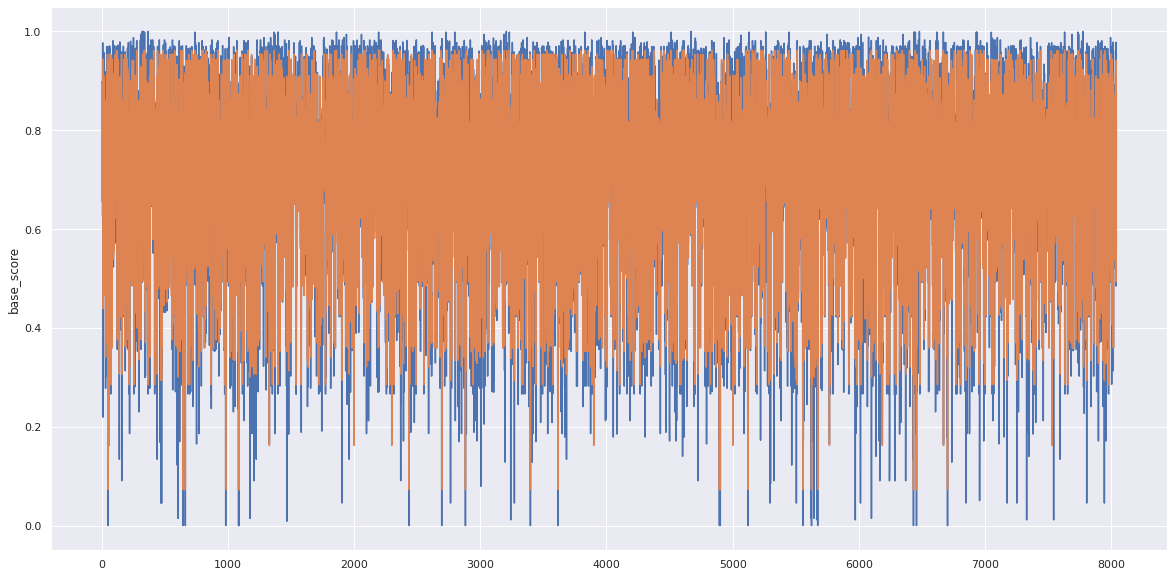

In [0]:
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(temp,y_test, ax=ax);
sns.lineplot(x=temp, y=pred, ax=ax);
plt.show()

> Best Evaluation Score was produced by **XG Boost : 93.25%** on our validation set

#PREPING TEST DATA

In [0]:
test_df.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [0]:
def prep_test(train_df):
  train_df['text'] = train_df['review_by_patient'] + ' ' + train_df['use_case_for_drug'] + ' ' + train_df['name_of_drug']
  del train_df['review_by_patient']
  del train_df['use_case_for_drug']
  del train_df['name_of_drug']
  del train_df['patient_id']

  train_df['drug_approved_by_UIC'] = pd.to_datetime(train_df['drug_approved_by_UIC'])

  train_df['day'] = train_df['drug_approved_by_UIC'].dt.day
  train_df['month'] = train_df['drug_approved_by_UIC'].dt.month
  train_df['year'] = train_df['drug_approved_by_UIC'].dt.year

  del train_df['drug_approved_by_UIC']

  train_df['effectiveness_rating'] = train_df['effectiveness_rating'].astype(int)
  train_df['number_of_times_prescribed'] = train_df['number_of_times_prescribed'].astype(int)

In [0]:
test1_df = test_df.copy()

In [0]:
prep_test(test1_df)

In [0]:
test1_df[['number_of_times_prescribed','day','month','year','effectiveness_rating']] = scaler1.transform(test1_df[['number_of_times_prescribed','day','month','year','effectiveness_rating']].to_numpy())

In [0]:
%%time
ct = cleantext(test1_df.text)
test1_df.text = test1_df.text.apply(ct.do_all)

CPU times: user 4min 17s, sys: 11.1 s, total: 4min 28s
Wall time: 4min 28s


In [0]:
test1_df.head()

,number_of_times_prescribed,effectiveness_rating,text,day,month,year
0,0.028534,1.000000,tri antidepress year citalopram fluoxetin amit...,0.900000,0.090909,0.444444
1,0.045396,0.888889,contrav combin drug us alcohol smok opioid ce ...,0.133333,0.181818,1.000000
2,0.016861,0.333333,four day first two week us arm fac put vaselin...,0.066667,0.545455,0.666667
3,0.027237,0.666667,methadon ten year cur try get drug decreas two...,0.566667,0.818182,0.888889
4,0.057069,0.111111,ditto rebound sleepless discontinu don strange...,0.400000,0.000000,0.777778


In [0]:
cv_text=cv.transform(test1_df.text)


print('BOW_cv_text:',cv_text.shape)

BOW_cv_text: (10760, 20933)


In [0]:
X = np.hstack((cv_text.toarray(),test1_df[['effectiveness_rating','number_of_times_prescribed','day','month','year']].values ))

In [0]:
pred = model.predict(X)

In [0]:
pred = scaler.inverse_transform(pred.reshape(-1,1))

In [0]:
pred = np.round_(pred,2)

In [0]:
test = test_df.copy()

In [0]:
test['base_score'] = pred

In [0]:
del test['name_of_drug']
del test['review_by_patient']
del test['drug_approved_by_UIC']
del test['number_of_times_prescribed']
del test['use_case_for_drug']
del test['effectiveness_rating']

In [0]:
test.head()

,patient_id,base_score
0,163740,8.39
1,39293,8.29
2,208087,6.03
3,23295,5.61
4,97013,6.45


In [0]:
from google.colab import files
test.to_csv('nlpfinal.csv') 
files.download('nlpfinal.csv')

>**END NOTES :** 
  * Our **XG Boost** model was able to produce a satisfactory evaluation score of **93%**. 
  * The model suffers one main limitation of not able to recognise new english words it didn't previouslty see during training but this can be overcome by use of Universal Sentence Encoders or Elmo encoders which understands the semantics in a sentence.